# Assignment 6: Pandas Groupby with Hurricane Data

Import Numpy, Pandas and Matplotlib and set the display options.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

from IPython import display
display.set_matplotlib_formats('retina')

Use the following code to load a CSV file of the [NOAA IBTrACS](https://www.ncdc.noaa.gov/ibtracs/index.php?name=ibtracs-data) hurricane dataset:

In [2]:
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


Basin Key: (NI - North Indian, SI - South Indian, WP - Western Pacific, SP - Southern Pacific, EP - Eastern Pacific, NA - North Atlantic)

How many rows does this dataset have?

In [3]:
print(len(df))

693795


In [4]:
# 693704

How many North Atlantic hurricanes are in this dataset?

In [5]:
df.groupby('BASIN').count()
#12192

,SID,SEASON,NUMBER,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
BASIN,,,,,,,,,,,
EP,60334,60334,60334,60334,53343,60334,60334,60334,60334,28777,16137
NA,121920,121920,121920,121920,49626,121920,121920,121920,121920,51453,20854
NI,54605,54605,54605,54605,3400,54605,54605,54605,54605,4672,4667
SA,119,119,119,119,0,119,119,119,119,61,61
SI,158105,158105,158105,158105,77711,158105,158105,158105,158105,25444,28138
SP,66194,66194,66194,66194,38661,66194,66194,66194,66194,12459,15343
WP,232518,232518,232518,232518,147855,232518,232518,232518,232518,25220,64954


### 1) Get the unique values of the `BASIN`, `SUBBASIN`, and `NATURE` columns

In [6]:
basinvals = df.BASIN.unique()
subbasinvals = df.SUBBASIN.unique()
naturevals = df.NATURE.unique()

In [7]:
basinvals

array(['NI', 'SI', 'NA', 'EP', 'WP', 'SP', 'SA'], dtype=object)

In [8]:
subbasinvals

array(['BB', 'AS', 'MM', 'GM', 'NA', 'CS', 'WA', 'EA', 'CP'], dtype=object)

In [9]:
naturevals

array(['NR', 'TS', 'ET', 'SS', 'MX', 'DS'], dtype=object)

### 2) Rename the `WMO_WIND` and `WMO_PRES` columns to `WIND` and `PRES`

In [10]:
df = df.rename(columns={"WMO_WIND": "WIND", "WMO_PRES": "PRES"})

### 3) Get the 10 largest rows in the dataset by `WIND`

In [11]:
df.nlargest(10, 'WIND')

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
665276,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 12:00:00,TS,17.3,-105.6,185.0,872.0
665274,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 06:00:00,TS,16.5,-105.4,180.0,886.0
665278,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 18:00:00,TS,18.3,-105.3,180.0,878.0
426787,1980214N11330,1980,57,NA,GM,ALLEN,1980-08-07 18:00:00,TS,21.8,-86.4,165.0,899.0
178210,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 00:00:00,TS,24.6,-80.5,160.0,892.0
178211,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 02:00:00,TS,24.8,-80.8,160.0,892.0
178213,1935241N23291,1935,46,NA,GM,NaN,1935-09-03 06:00:00,TS,25.1,-81.1,160.0,NaN
481225,1988253N12306,1988,74,NA,CS,GILBERT,1988-09-14 00:00:00,TS,19.7,-83.8,160.0,888.0
551610,1997253N12255,1997,81,EP,MM,LINDA,1997-09-12 06:00:00,TS,17.1,-109.6,160.0,902.0
604897,2005289N18282,2005,97,NA,CS,WILMA,2005-10-19 12:00:00,TS,17.3,-82.8,160.0,882.0


You will notice some names are repeated.

### 4) Group the data on `SID` and get the 10 largest hurricanes by `WIND`

In [12]:
df.groupby('SID').WIND.max().nlargest(10)

SID
2015293N13266    185.0
1980214N11330    165.0
1935241N23291    160.0
1988253N12306    160.0
1997253N12255    160.0
2005289N18282    160.0
2019236N10314    160.0
1998295N12284    155.0
2005261N21290    155.0
2009288N07267    155.0
Name: WIND, dtype: float64

### 5) Make a bar chart of the wind speed of the 20 strongest-wind hurricanes

Use the name on the x-axis.

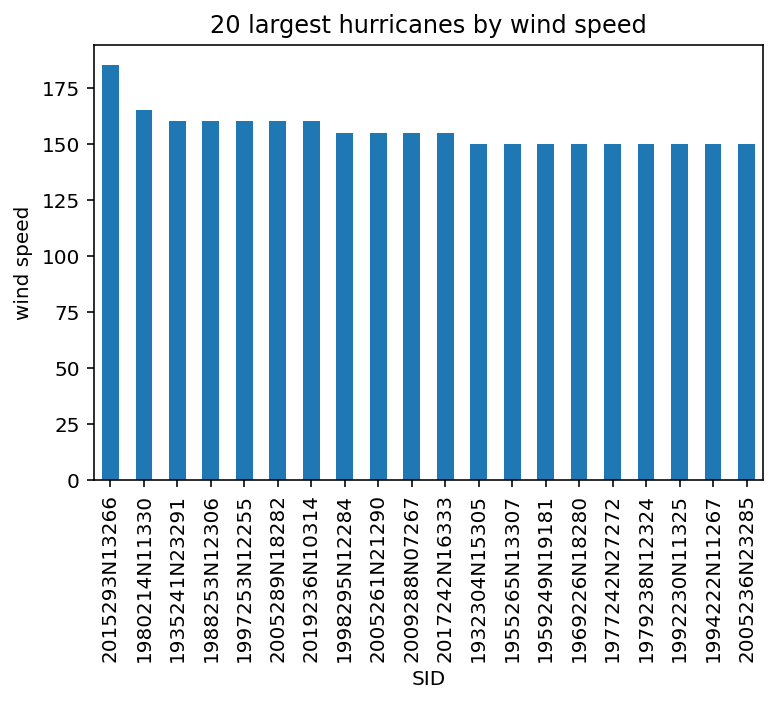

In [13]:
df.groupby('SID').WIND.max().nlargest(20).plot(kind='bar', title = "20 largest hurricanes by wind speed", ylabel='wind speed');

### 6) Plot the count of all datapoints by Basin

as a bar chart

<AxesSubplot:title={'center':'count of datapoints by basin'}, xlabel='BASIN', ylabel='count'>

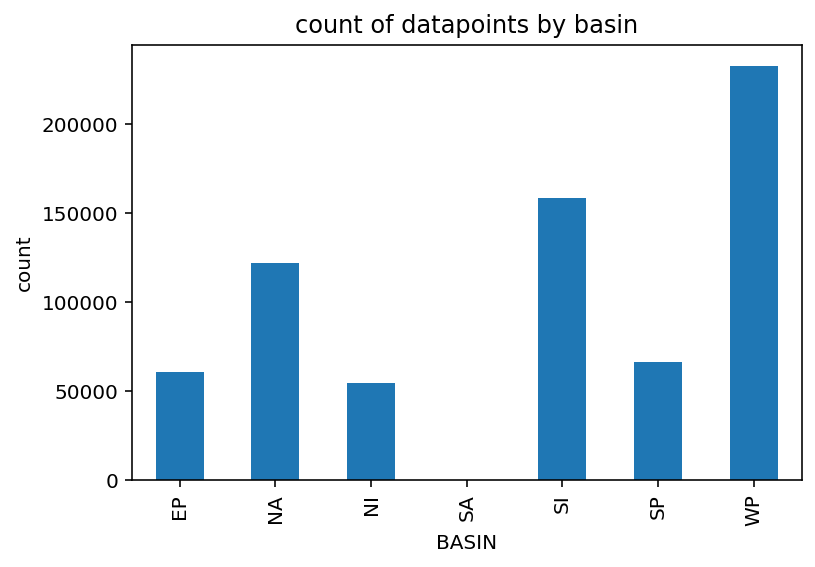

In [14]:
df.groupby('BASIN').SEASON.count().plot(kind='bar', title = "count of datapoints by basin", ylabel='count')

### 7) Plot the count of unique hurricanes by Basin

as a bar chart.

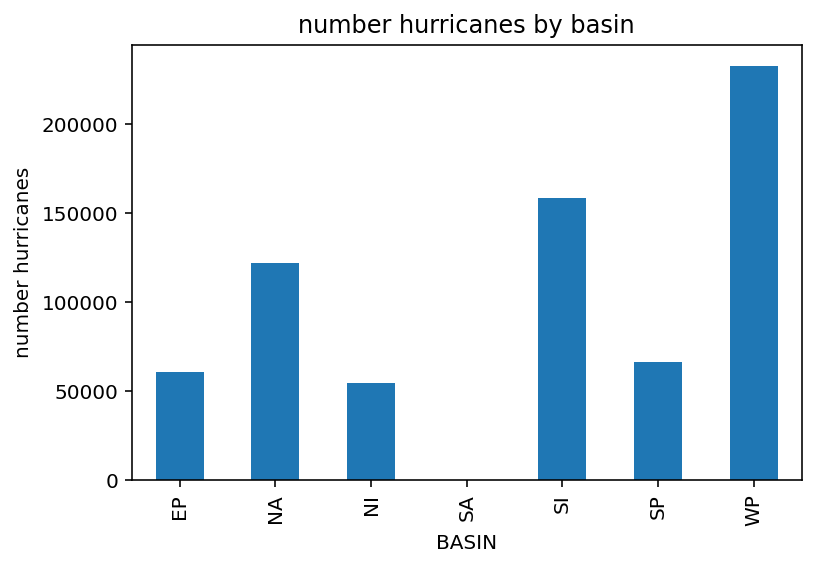

In [15]:
df.groupby('BASIN').BASIN.count().plot(kind='bar', ylabel='number hurricanes', title='number hurricanes by basin');

### 8) Make a `hexbin` of the location of datapoints in Latitude and Longitude

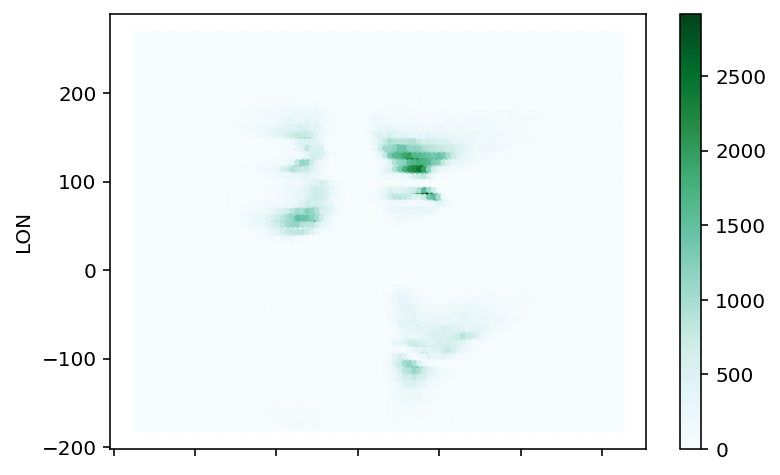

In [16]:
ax = df.plot.hexbin('LAT', 'LON')

### 9) Find Hurricane Katrina (from 2005) and plot its track as a scatter plot

First find the SID of this hurricane.

In [17]:
katrina = df[(df['NAME'] == "KATRINA") & (df['SEASON'] == 2005)]
katrina['SID']

602896    2005236N23285
602897    2005236N23285
602898    2005236N23285
602899    2005236N23285
602900    2005236N23285
              ...      
602955    2005236N23285
602956    2005236N23285
602957    2005236N23285
602958    2005236N23285
602959    2005236N23285
Name: SID, Length: 64, dtype: object

In [18]:
katrina

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
602896,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-23 18:00:00,TS,23.1000,-75.1000,30.0,1008.0
602897,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-23 21:00:00,TS,23.2476,-75.4049,NaN,NaN
602898,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 00:00:00,TS,23.4000,-75.7000,30.0,1007.0
602899,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 03:00:00,TS,23.5700,-75.9726,NaN,NaN
602900,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 06:00:00,TS,23.8000,-76.2000,30.0,1007.0
...,...,...,...,...,...,...,...,...,...,...,...,...
602955,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-30 18:00:00,TS,37.0000,-87.0000,30.0,990.0
602956,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-30 21:00:00,TS,37.7916,-86.2537,NaN,NaN
602957,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-31 00:00:00,ET,38.6000,-85.3000,30.0,994.0
602958,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-31 03:00:00,ET,39.3681,-84.1578,NaN,NaN


Next get this hurricane's group and plot its position as a scatter plot. Use wind speed to color the points.

<AxesSubplot:xlabel='LON', ylabel='LAT'>

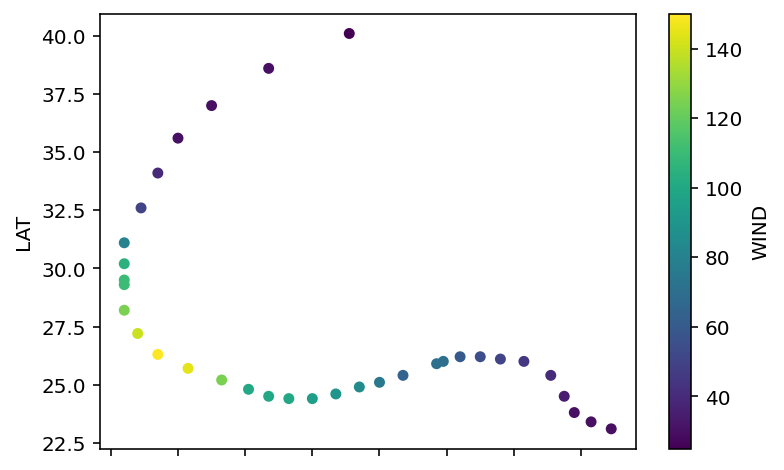

In [19]:
katrina.plot.scatter(x='LON', y='LAT', c='WIND', colormap = 'viridis' )

### 10) Make time the index on your dataframe

In [20]:
df = df.set_index('ISO_TIME')

### 11) Plot the count of all datapoints per year as a timeseries

You should use `resample`

<AxesSubplot:xlabel='ISO_TIME'>

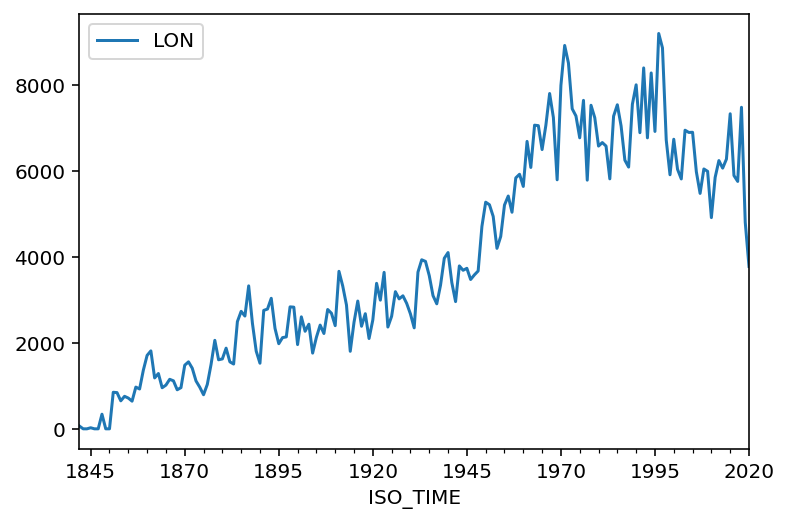

In [21]:
df.resample('Y').count().plot(y='LON')

### 12) Plot all tracks from the North Atlantic in 2005

You will probably have to iterate through a `GroupBy` object

In [22]:
gb = df[(df['BASIN'] == "NA") & (df['SEASON'] == 2005)].groupby('SID')

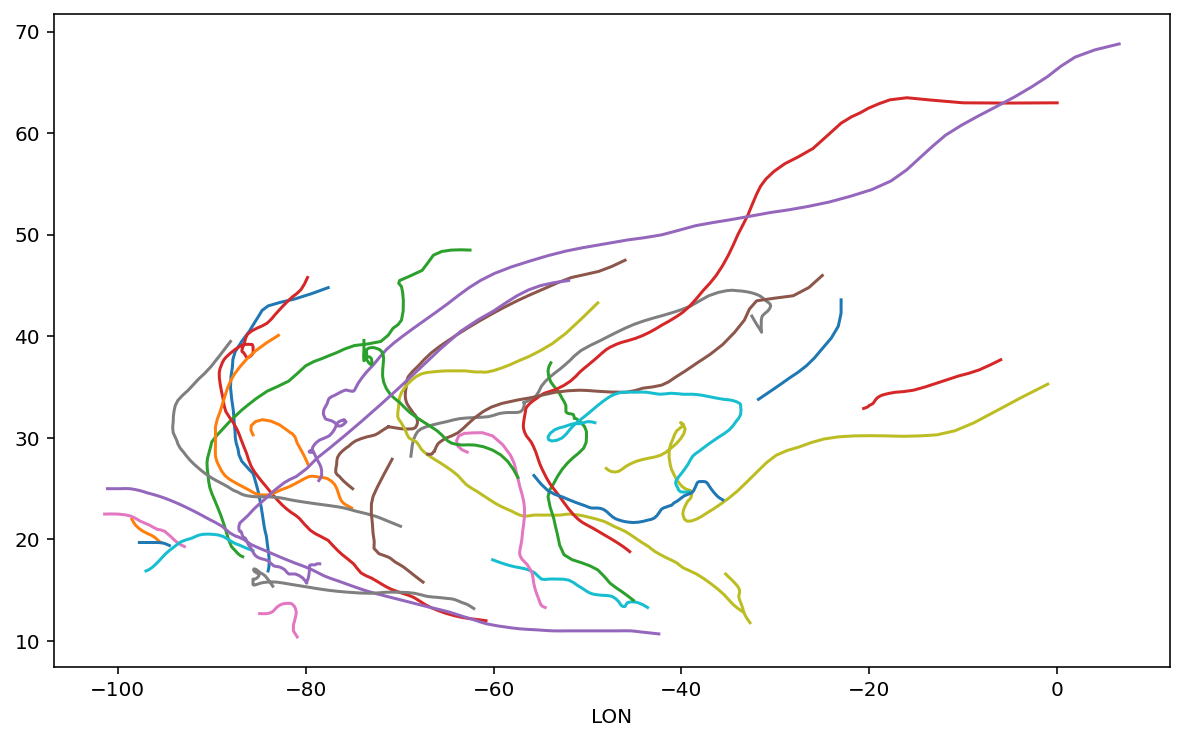

In [28]:
fig, ax = plt.subplots(figsize = (10,6))
for key, group in gb:
    group.plot(kind = 'line', x='LON', y='LAT', ax=ax, legend=False)

### 13) Create a filtered dataframe that contains only data since 1970 from the North Atlantic ("NA") Basin

Use this for the rest of the assignment

In [24]:
na = df[(df['BASIN'] == "NA") & (df['SEASON'] >= 1970)]

### 14) Plot the number of datapoints per day from this filtered dataframe

Make sure you figure is big enough to actually see the plot

[]

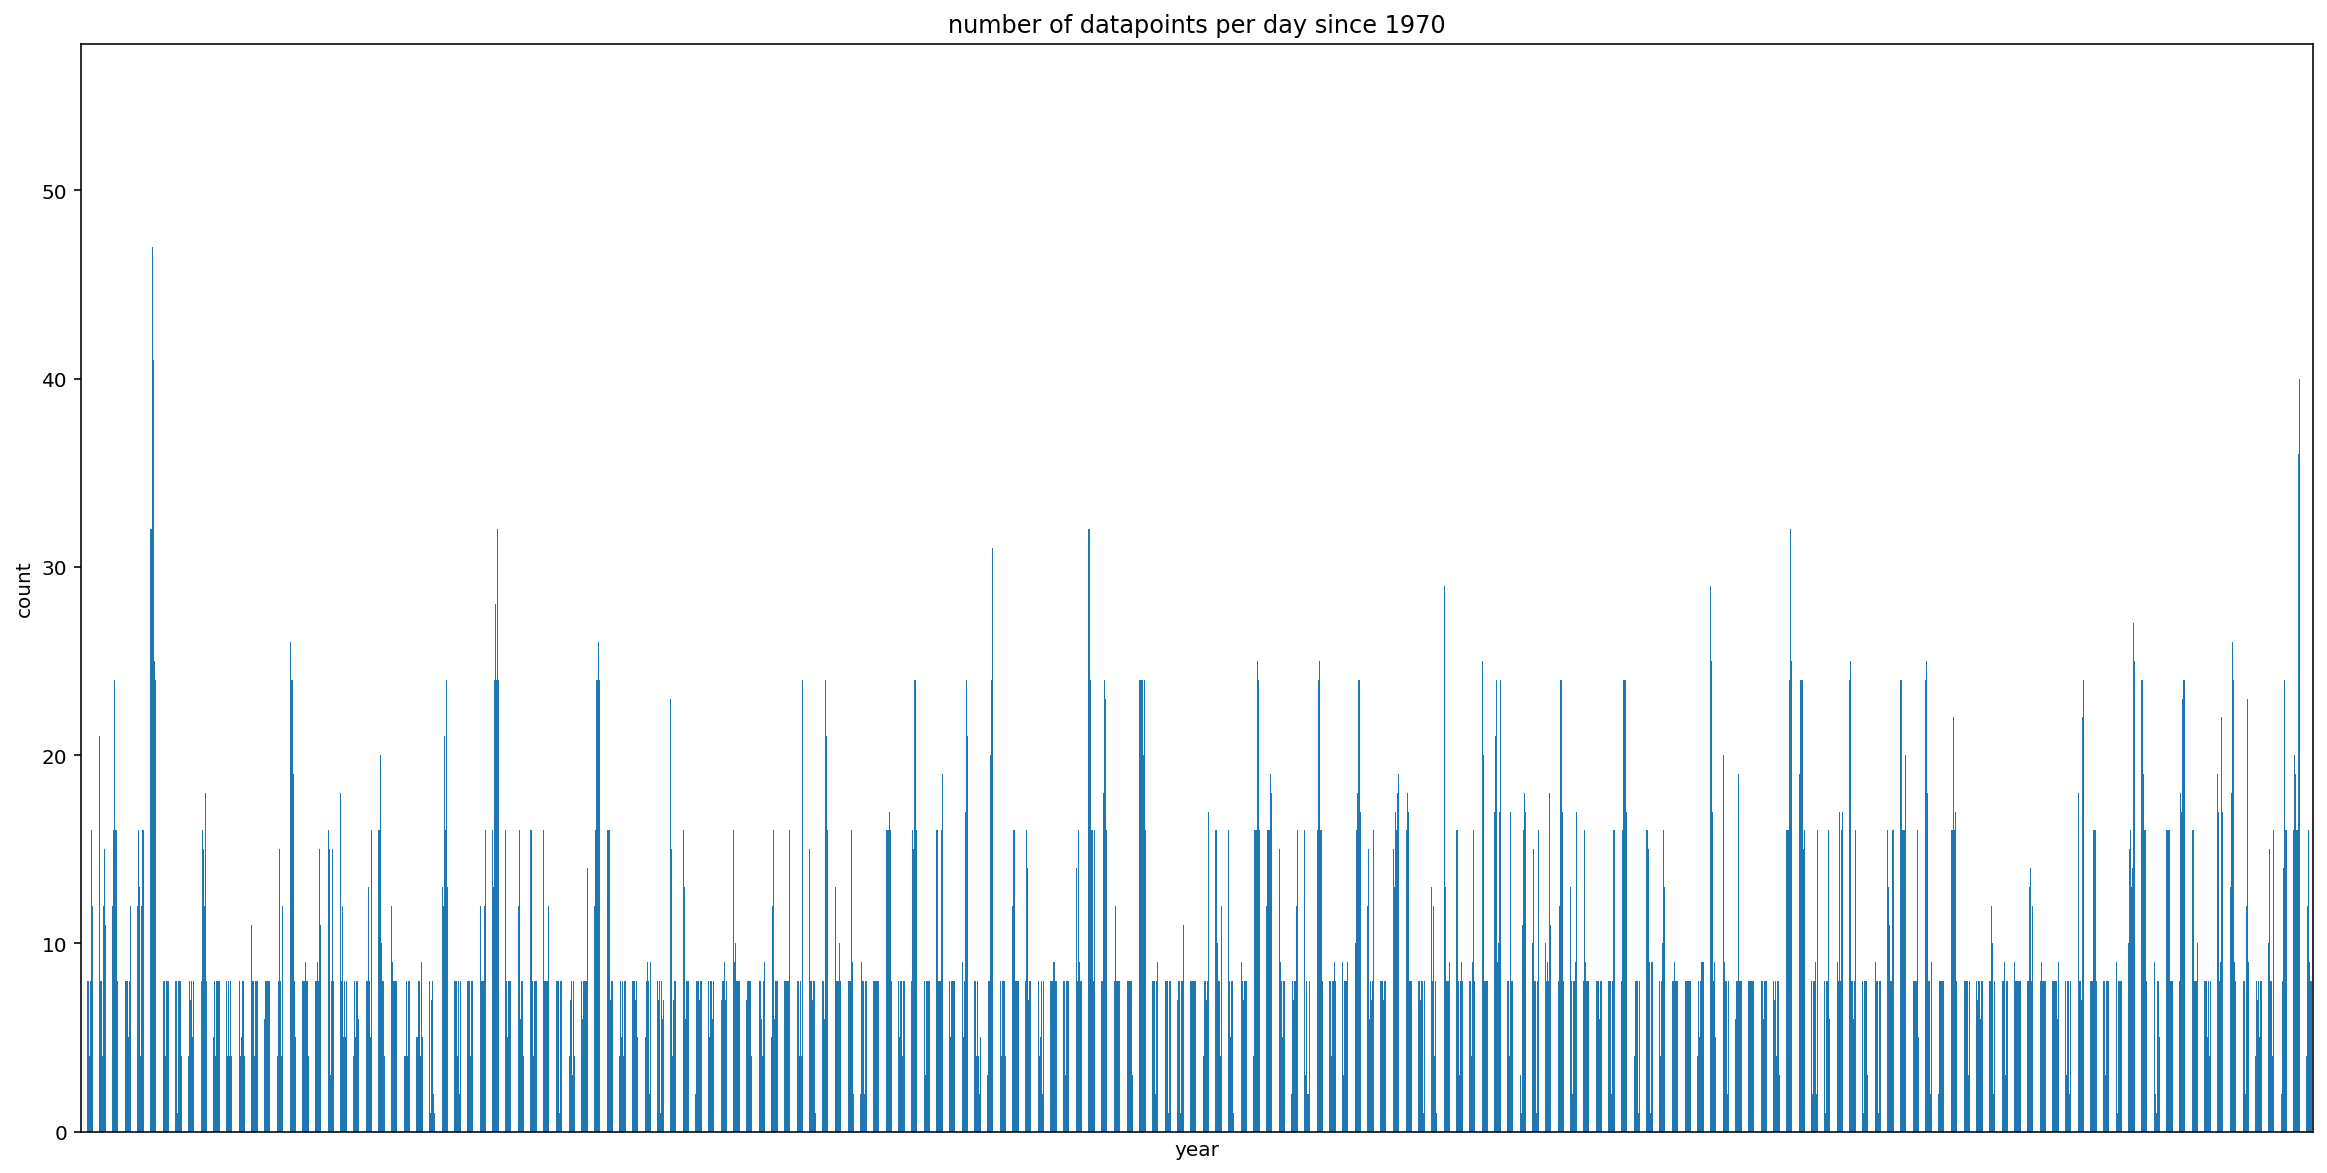

In [30]:
fig, ax = plt.subplots(figsize = (10,6))
perday = na.groupby(na.index.date).SEASON.count()
perday.plot(kind='bar',xlabel='year',ylabel='count',title='number of datapoints per day since 1970', figsize=(20,10))
plt.gca().set_xticks([])
plt.xticks([])
ax.set_xticks([])

### 15) Calculate the climatology of datapoint counts as a function of `dayofyear`

Plot the mean and standard deviation on a single figure

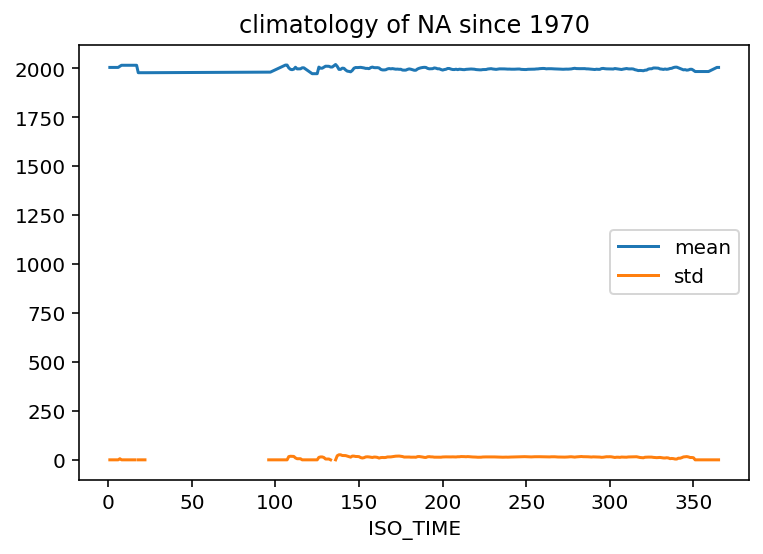

In [42]:
na.groupby(na.index.dayofyear).SEASON.aggregate(['mean','std']).plot(title='climatology of NA since 1970');

### 16) Use `transform` to calculate the anomaly of daily counts from the climatology

Resample the anomaly timeseries at annual resolution and plot a line with dots as markers.

In [44]:
def standardize(x):
    return (x - x.mean())/x.std()

In [48]:
anomaly = na.groupby(na.index.dayofyear).transform(standardize)
anomaly

,SEASON,NUMBER,LAT,LON,WIND,PRES
ISO_TIME,,,,,,
1970-05-17 18:00:00,-1.897367,1.897367,-1.873970,0.416403,NaN,NaN
1970-05-17 21:00:00,-1.897367,1.897367,-1.862379,0.288645,NaN,NaN
1970-05-18 00:00:00,-0.968246,0.968246,-1.022988,-0.334111,NaN,NaN
1970-05-18 03:00:00,-0.968246,0.968246,-1.001428,-0.510222,NaN,NaN
1970-05-18 06:00:00,-0.968246,0.968246,-0.979869,-0.708974,NaN,NaN
...,...,...,...,...,...,...
2020-10-11 12:00:00,1.328925,-0.270728,0.559761,-1.143261,NaN,NaN
2020-10-11 15:00:00,1.328925,-0.270728,0.585105,-1.118551,NaN,NaN
2020-10-11 18:00:00,1.328925,-0.270728,0.590543,-1.093768,NaN,NaN


,SEASON,NUMBER,LAT,LON,WIND,PRES
ISO_TIME,,,,,,
1970-12-31,"AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)"
1971-12-31,"AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)"
1972-12-31,"AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)"
1973-12-31,"AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)"
1974-12-31,"AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)"
1975-12-31,"AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)"
1976-12-31,"AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)"
1977-12-31,"AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)"
1978-12-31,"AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)"


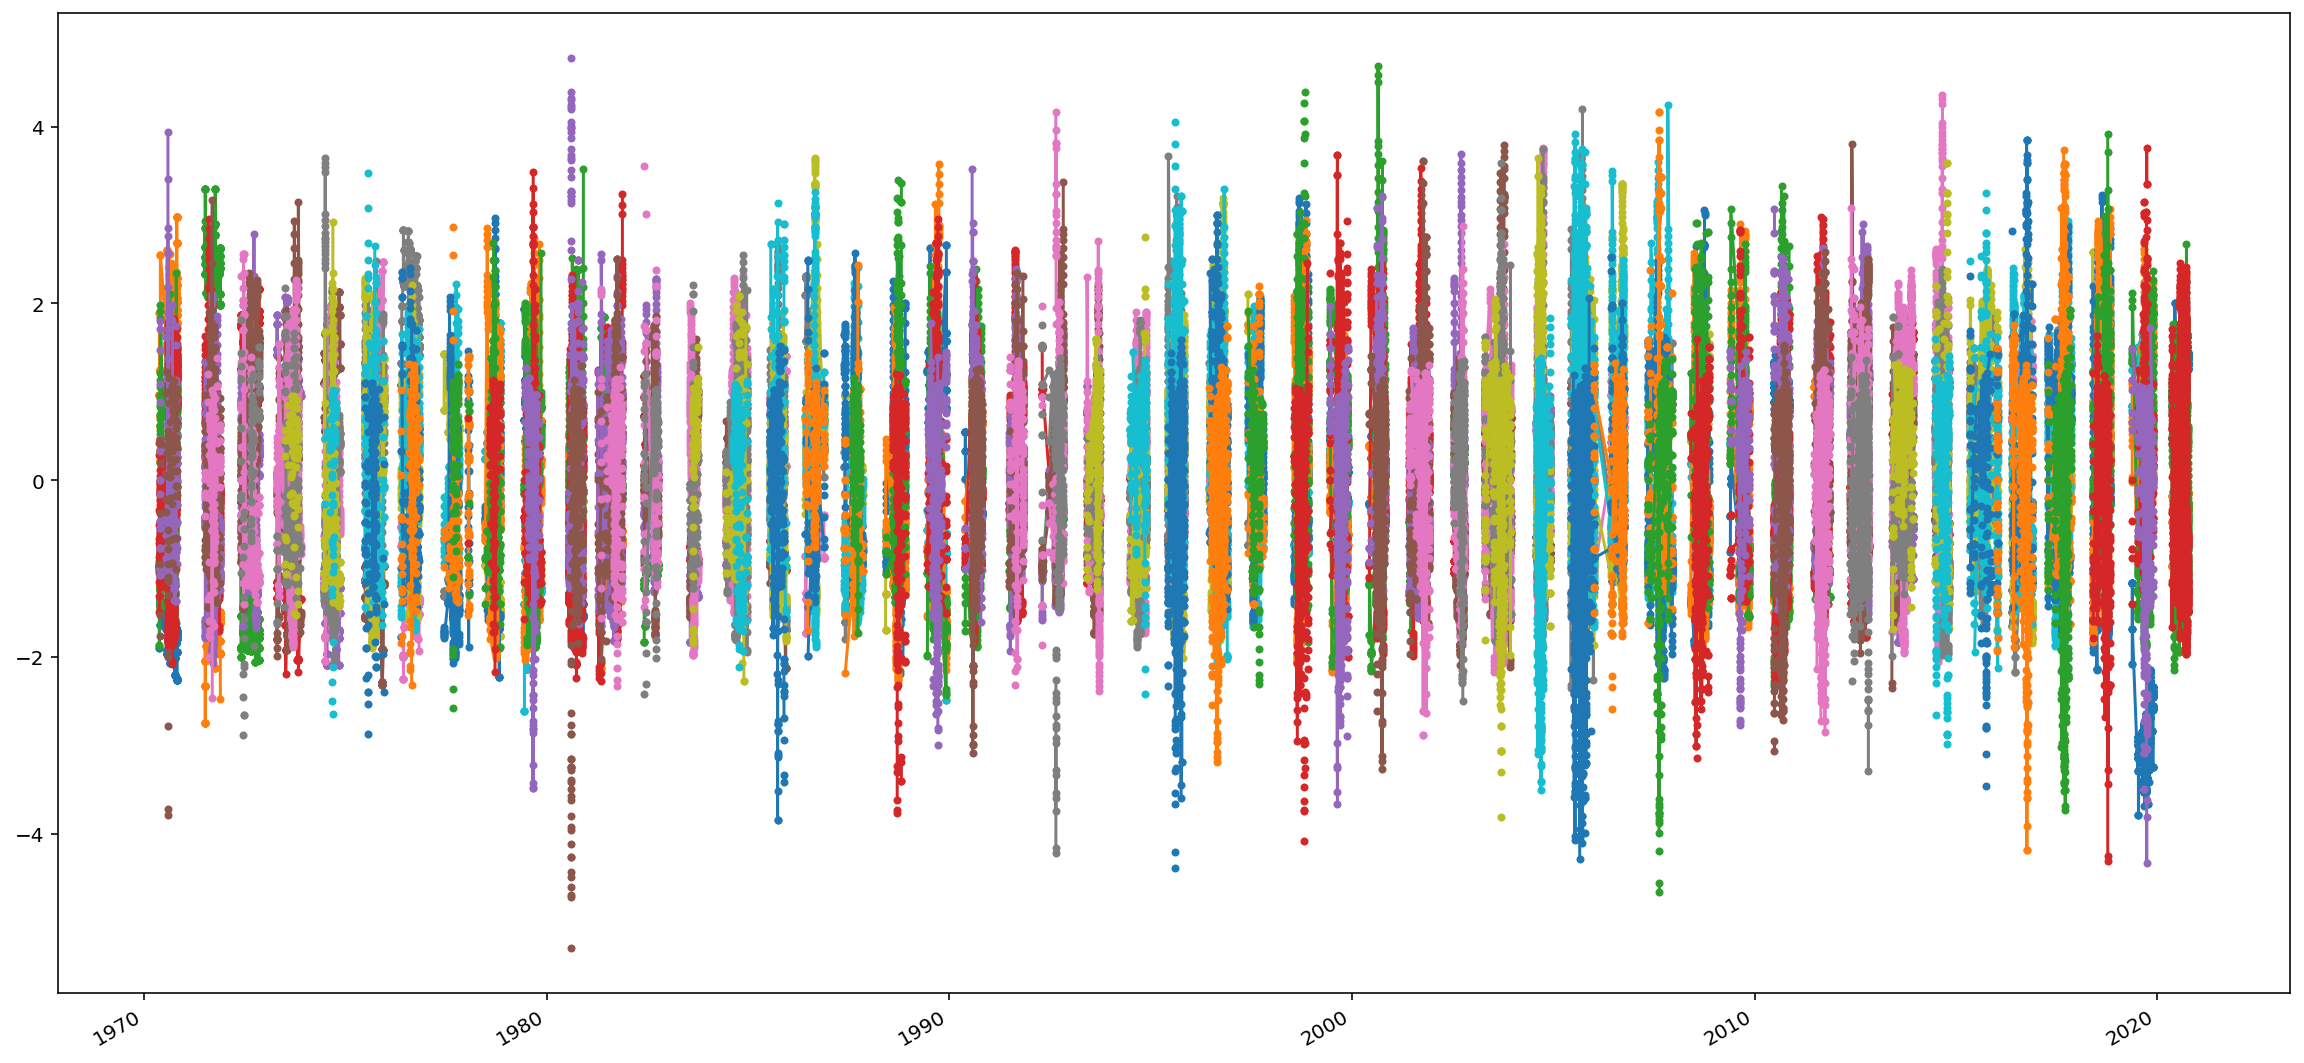

In [54]:
fig, ax = plt.subplots(figsize = (20,10))
anomaly.resample('Y').plot(marker='.')

Which years stand out as having anomalous hurricane activity?